## Package Import

In [ ]:
# import necessary libraries and modules
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

## Dataset Import 

In [ ]:
# load the Olivetti faces dataset
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


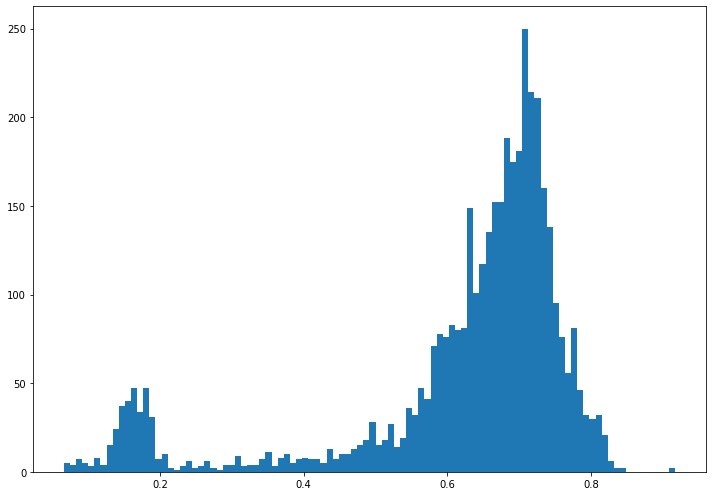

In [ ]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(X[2], bins = 100)
 
# Show plot
plt.show()

In [ ]:
# calculate the correlation matrix
corr_matrix = np.corrcoef(X)

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True)

# show the plot
plt.show()

NameError: ignored

In [ ]:
plt.plot(sorted(X[0]))

## Prepare train and test set

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

# Statistical Learning

## Running the Model without PCA

### Logistic

Out-sample Accuracy for logistic regression: 0.975
Time Comsumption: 5.121288776397705 sec.


<Axes: >

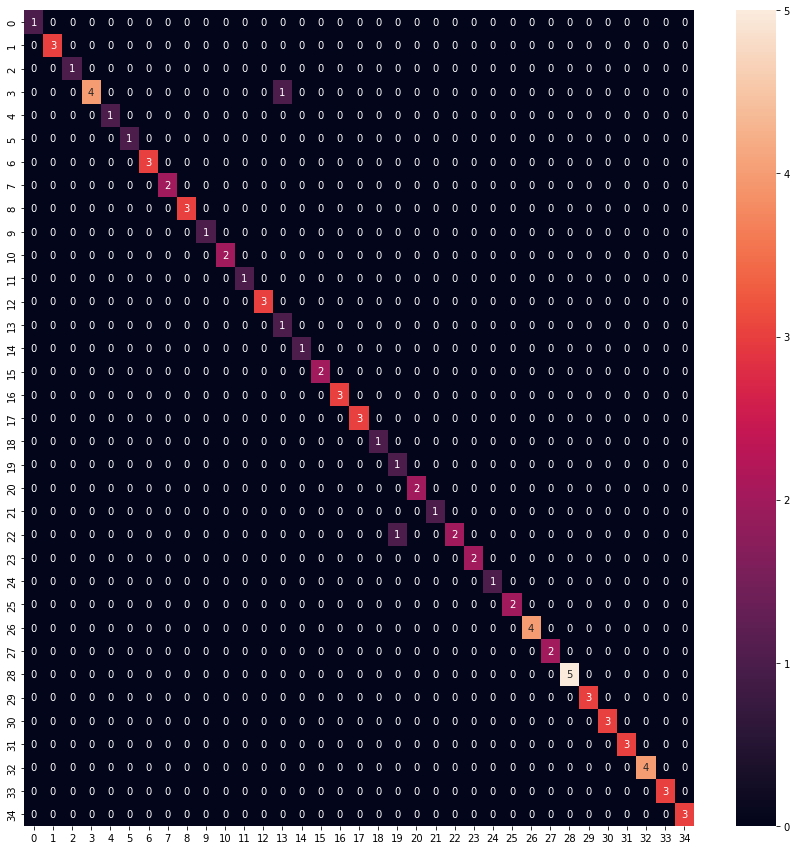

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

start = time.time()
# Create a logistic regression model
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print("Out-sample Accuracy for logistic regression:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

In [ ]:
y_pred

array([29, 26, 20,  2, 28, 18,  8,  0, 13, 36, 39, 37, 26,  7, 14, 32, 25,
       10,  5, 14,  6, 23, 38,  3,  7, 29, 20, 38, 13,  3, 19,  3,  1, 21,
       12, 36, 34, 25, 23,  8, 31, 30,  3,  6, 31, 39, 20,  4, 18, 30, 24,
       34,  1, 37, 32,  6, 29, 22, 32, 38, 10, 37, 29,  9, 13, 31, 22, 37,
        1, 36, 28, 19, 15, 31, 27, 39, 31,  8, 19, 34])

In [ ]:
y_train

array([28, 33, 33,  5, 32, 27, 22,  1, 11, 18,  2, 12,  4,  0, 21, 15, 34,
       16, 19, 39, 10, 15, 18, 12,  9, 11, 18,  8, 16,  1, 38,  9, 30,  7,
       39, 34,  2, 24, 36, 20,  4, 26,  1,  3, 13, 37,  5,  5, 21,  4, 37,
       23, 16, 10,  9,  2, 29, 27, 18, 25, 39, 19, 22,  0,  2,  7, 28, 32,
       20,  4,  3, 35, 27, 39,  1, 17, 18,  9, 22, 11, 27,  9, 19, 17, 11,
       20,  8, 28, 24, 13, 11, 20, 15, 37, 24,  7, 15, 16, 27, 20, 28, 15,
        7, 17,  0, 14, 36,  2, 38, 16,  0,  5,  3, 12, 32, 35, 22, 29, 14,
       23, 39, 38, 37, 10, 23, 18, 33, 26, 17, 27, 36, 27, 35, 24, 16, 35,
        5, 26, 22, 36,  6,  6,  4, 11, 11, 12, 32,  7, 21, 34, 38, 31, 33,
       37, 26, 33, 33, 23,  7, 17,  7,  0, 25, 29, 14, 34, 34,  1,  4,  6,
       28, 16,  5,  8, 25, 24, 25, 22,  5, 28, 33, 39,  4,  5, 35, 20,  6,
        0, 37, 35, 32,  9,  3, 17, 23, 26,  9, 36, 26, 19, 24, 30, 19,  4,
        3, 36, 11, 35, 11, 14, 31, 31, 23, 22, 22,  0, 27, 30, 35, 35, 26,
       38, 12, 27, 13, 30

### LDA

Out-sample Accuracy for LDA: 0.9875
Time Comsumption: 0.4912984371185303 sec.


<Axes: >

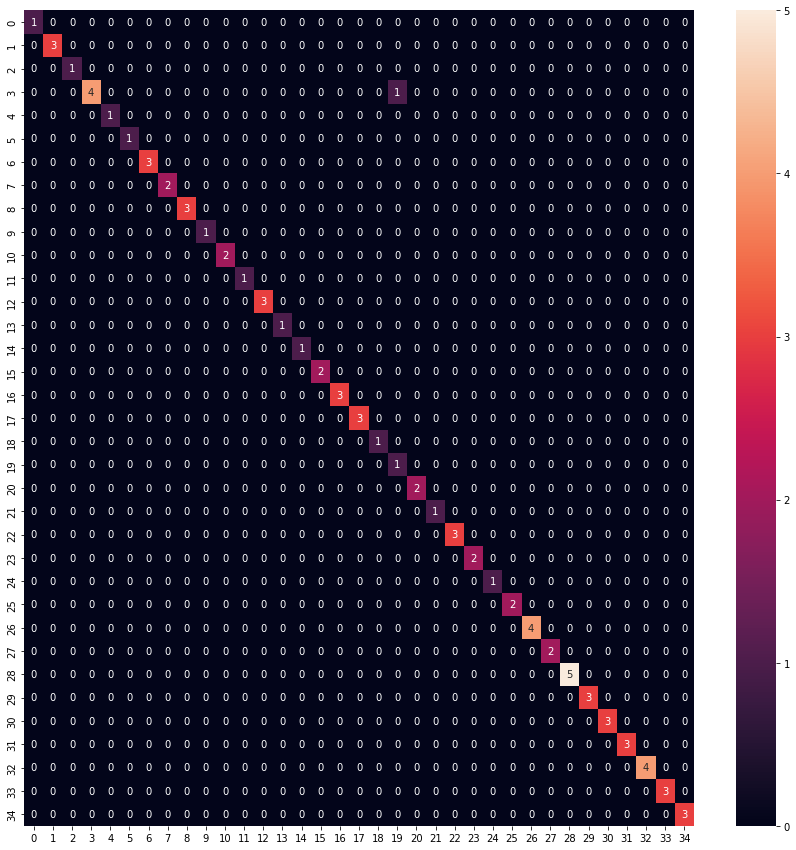

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

start = time.time()
# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=39)

# Train the LDA model
lda.fit(X_train, y_train)


# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the accuracy
print("Out-sample Accuracy for LDA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)


## Running the Model with PCA

### Preprocessing with PCA (number of PCs = 60)

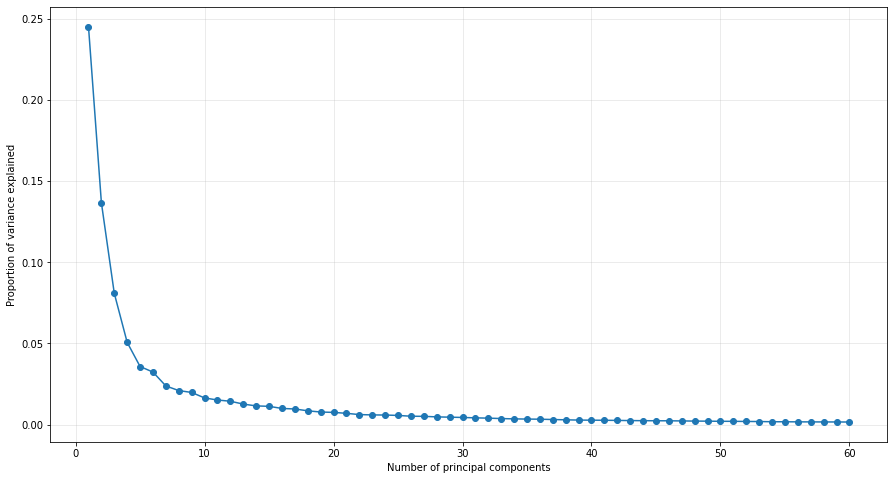

In [ ]:
from sklearn.decomposition import PCA

# load the Olivetti faces dataset
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)

# Apply PCA to the testing set
X_test_pca = pca.transform(X_test)

# visualizw results
plt.figure(figsize=(15,8))
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([2.45193377e-01, 1.36716321e-01, 8.08641389e-02, 5.06614894e-02,
       3.57967392e-02, 3.23665738e-02, 2.38147099e-02, 2.09729318e-02,
       1.98132005e-02, 1.64333191e-02, 1.51590677e-02, 1.44009283e-02,
       1.26379784e-02, 1.15252286e-02, 1.12658348e-02, 9.96051542e-03,
       9.63265635e-03, 8.50027334e-03, 7.75351562e-03, 7.52614252e-03,
       6.95416983e-03, 6.17652852e-03, 5.97592676e-03, 5.89888869e-03,
       5.65932645e-03, 5.17124729e-03, 5.09206345e-03, 4.76128655e-03,
       4.58501792e-03, 4.40818863e-03, 4.16215090e-03, 3.98658169e-03,
       3.73228244e-03, 3.53213609e-03, 3.41654988e-03, 3.33407545e-03,
       3.13301850e-03, 2.95350631e-03, 2.79697101e-03, 2.73164851e-03,
       2.68480834e-03, 2.58741993e-03, 2.48973025e-03, 2.43344391e-03,
       2.37066485e-03, 2.35964940e-03, 2.27649859e-03, 2.18776986e-03,
       2.13615410e-03, 2.05721427e-03, 2.04063859e-03, 1.96966878e-03,
       1.89478090e-03, 1.82180095e-03, 1.79036416e-03, 1.75260869e-03,
      

In [ ]:
a = pca.explained_variance_ratio_

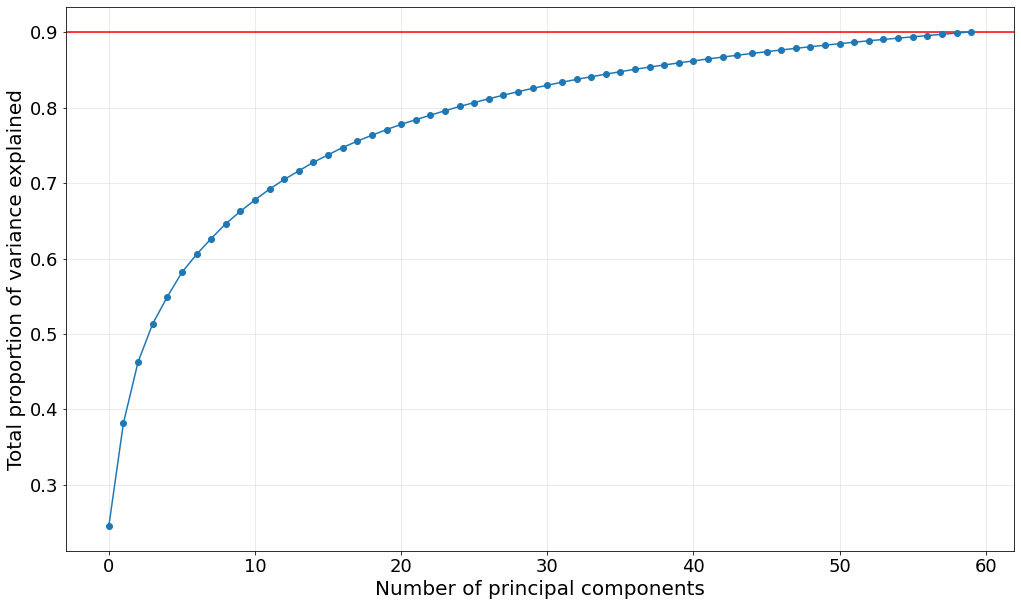

In [ ]:
plt.figure(figsize=(17,10))
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.plot( p, 'o-')
plt.tick_params(labelsize=18)
plt.xlabel('Number of principal components', size=20)
plt.ylabel('Total proportion of variance explained',size=20)
plt.grid(alpha=0.3)
plt.show()

### Logistic with PCA

Out-sample Accuracy for logistic regression with PCA: 0.975
Time Comsumption: 0.09348225593566895 sec.


<Axes: >

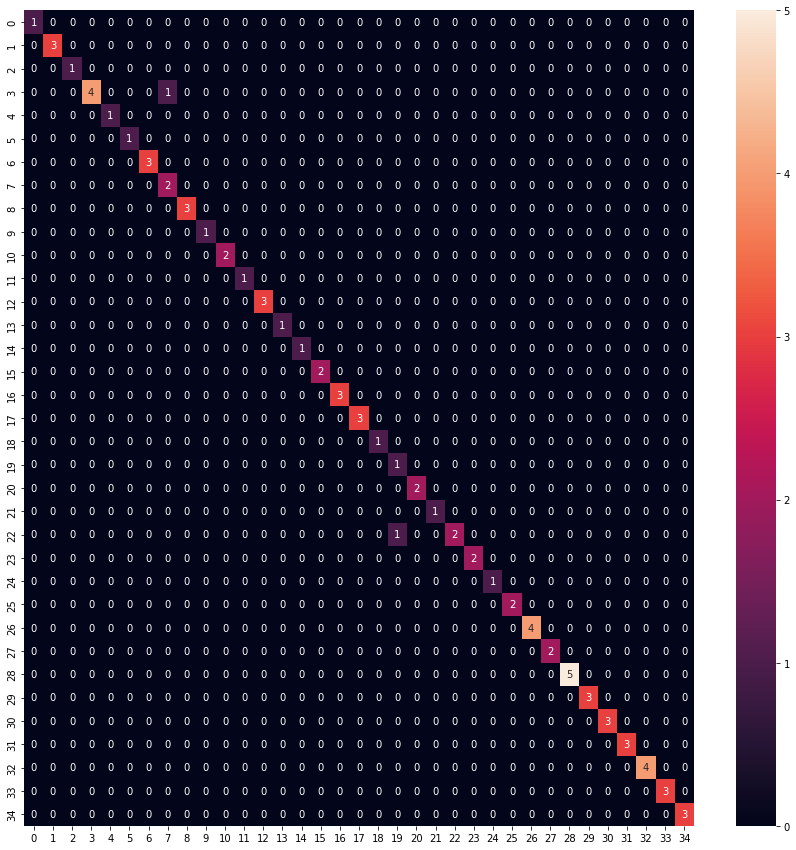

In [ ]:
start = time.time()
# Create a logistic regression model
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train_pca, y_train)

# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print("Out-sample Accuracy for logistic regression with PCA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

### LDA with PCA

Out-sample Accuracy for LDA: 0.975
Time Comsumption: 0.04818916320800781 sec.


<Axes: >

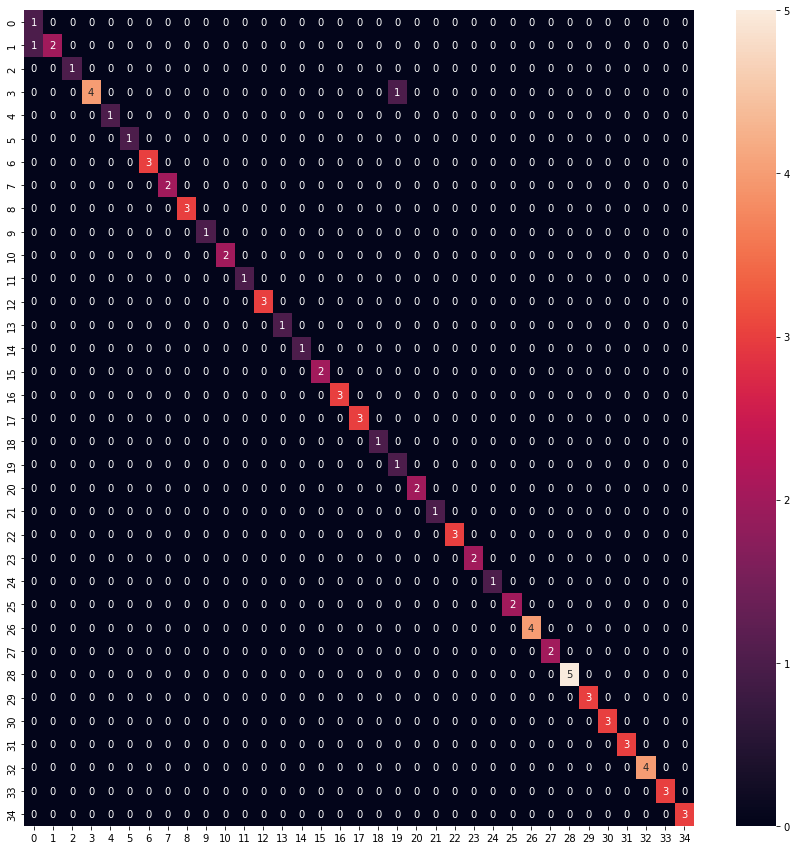

In [ ]:
start = time.time()
# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=39)

# Train the LDA model
lda.fit(X_train_pca, y_train)


# Make predictions on the test set
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the accuracy
print("Out-sample Accuracy for LDA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

# Deep Learning: CNN

Epoch 1/100
10/10 [==============================] - 5s 255ms/step - loss: 3.9953 - accuracy: 0.0219 - val_loss: 3.6914 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 1s 146ms/step - loss: 3.6903 - accuracy: 0.0312 - val_loss: 3.6903 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 1s 149ms/step - loss: 3.6854 - accuracy: 0.0312 - val_loss: 3.6912 - val_accuracy: 0.0125
Epoch 4/100
10/10 [==============================] - 2s 152ms/step - loss: 3.6851 - accuracy: 0.0406 - val_loss: 3.6922 - val_accuracy: 0.0125
Epoch 5/100
10/10 [==============================] - 2s 156ms/step - loss: 3.6818 - accuracy: 0.0344 - val_loss: 3.6931 - val_accuracy: 0.0125
Epoch 6/100
10/10 [==============================] - 2s 252ms/step - loss: 3.6787 - accuracy: 0.0375 - val_loss: 3.6942 - val_accuracy: 0.0125
Epoch 7/100
10/10 [==============================] - 2s 154ms/step - loss: 3.6768 - accuracy: 0.0312 - val_loss: 3.6950 - val_accuracy

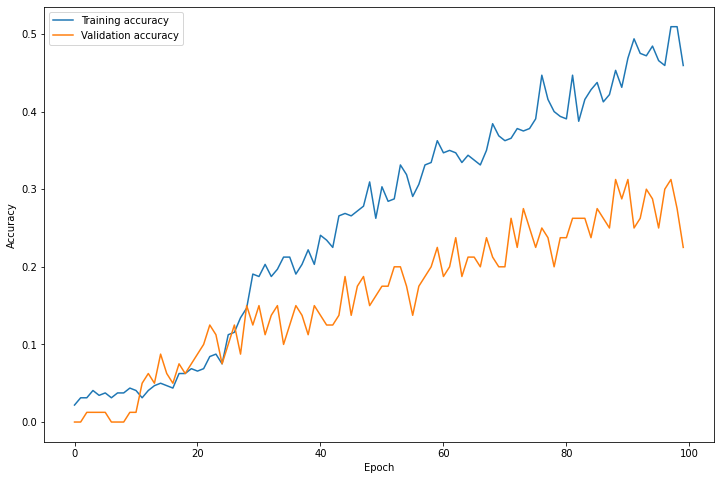

In [ ]:
# optimizer = Adam, batchsize = 32
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.8),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/25
5/5 [==============================] - 2s 349ms/step - loss: 3.7137 - accuracy: 0.0188 - val_loss: 3.7151 - val_accuracy: 0.0000e+00
Epoch 2/25
5/5 [==============================] - 2s 313ms/step - loss: 3.6837 - accuracy: 0.0312 - val_loss: 3.7023 - val_accuracy: 0.0000e+00
Epoch 3/25
5/5 [==============================] - 2s 314ms/step - loss: 3.6800 - accuracy: 0.0312 - val_loss: 3.7338 - val_accuracy: 0.0000e+00
Epoch 4/25
5/5 [==============================] - 2s 307ms/step - loss: 3.6691 - accuracy: 0.0375 - val_loss: 3.7642 - val_accuracy: 0.0000e+00
Epoch 5/25
5/5 [==============================] - 2s 317ms/step - loss: 3.6587 - accuracy: 0.0344 - val_loss: 3.7987 - val_accuracy: 0.0000e+00
Epoch 6/25
5/5 [==============================] - 2s 361ms/step - loss: 3.6466 - accuracy: 0.0406 - val_loss: 3.7898 - val_accuracy: 0.0000e+00
Epoch 7/25
5/5 [==============================] - 2s 413ms/step - loss: 3.6214 - accuracy: 0.0750 - val_loss: 3.7504 - val_accuracy: 0.0

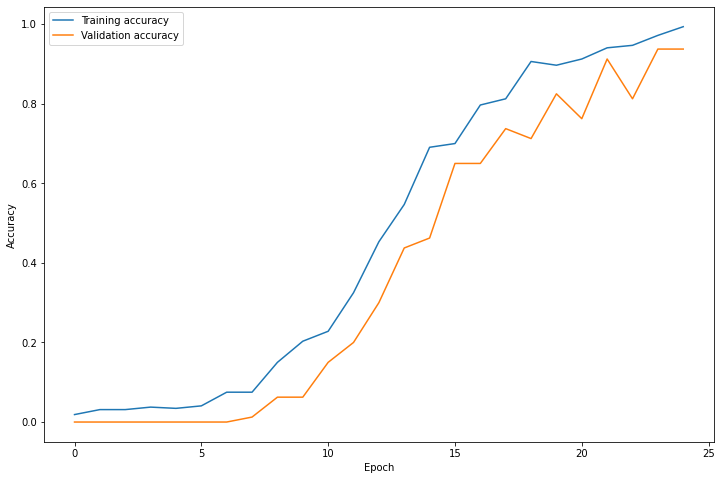

In [ ]:
# optimizer = Adam, batchsize = 64
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/25
5/5 [==============================] - 2s 262ms/step - loss: 3.7460 - accuracy: 0.0281 - val_loss: 3.6913 - val_accuracy: 0.0125
Epoch 2/25
5/5 [==============================] - 1s 226ms/step - loss: 3.6831 - accuracy: 0.0594 - val_loss: 3.6898 - val_accuracy: 0.0125
Epoch 3/25
5/5 [==============================] - 2s 382ms/step - loss: 3.6721 - accuracy: 0.0375 - val_loss: 3.6882 - val_accuracy: 0.0125
Epoch 4/25
5/5 [==============================] - 1s 223ms/step - loss: 3.6565 - accuracy: 0.0500 - val_loss: 3.7016 - val_accuracy: 0.0000e+00
Epoch 5/25
5/5 [==============================] - 1s 226ms/step - loss: 3.6278 - accuracy: 0.0531 - val_loss: 3.6697 - val_accuracy: 0.0125
Epoch 6/25
5/5 [==============================] - 1s 224ms/step - loss: 3.5758 - accuracy: 0.1531 - val_loss: 3.6261 - val_accuracy: 0.1250
Epoch 7/25
5/5 [==============================] - 1s 247ms/step - loss: 3.5183 - accuracy: 0.0938 - val_loss: 3.5925 - val_accuracy: 0.0625
Epoch 8/25
5/5 [

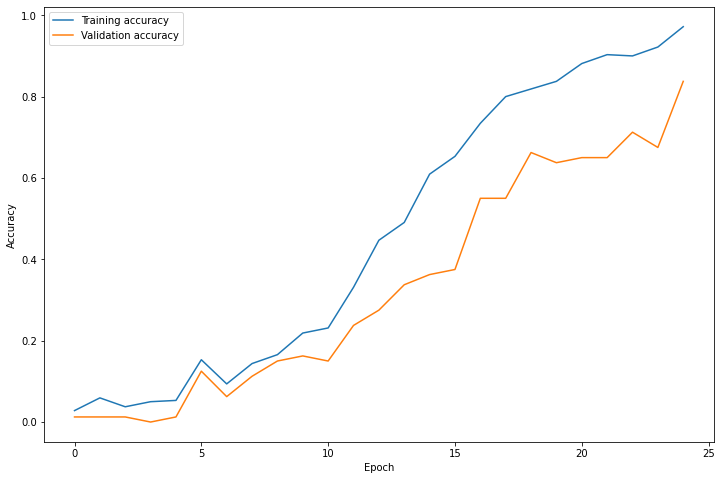

In [ ]:
# optimizer = Adam, batchsize = 64, remove one hidden layer
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    # layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/25
10/10 [==============================] - 2s 163ms/step - loss: 3.6917 - accuracy: 0.0219 - val_loss: 3.6836 - val_accuracy: 0.0375
Epoch 2/25
10/10 [==============================] - 2s 152ms/step - loss: 3.6902 - accuracy: 0.0219 - val_loss: 3.6849 - val_accuracy: 0.0375
Epoch 3/25
10/10 [==============================] - 1s 152ms/step - loss: 3.6893 - accuracy: 0.0219 - val_loss: 3.6861 - val_accuracy: 0.0375
Epoch 4/25
10/10 [==============================] - 1s 147ms/step - loss: 3.6884 - accuracy: 0.0219 - val_loss: 3.6871 - val_accuracy: 0.0375
Epoch 5/25
10/10 [==============================] - 2s 227ms/step - loss: 3.6880 - accuracy: 0.0219 - val_loss: 3.6881 - val_accuracy: 0.0375
Epoch 6/25
10/10 [==============================] - 2s 154ms/step - loss: 3.6870 - accuracy: 0.0219 - val_loss: 3.6890 - val_accuracy: 0.0375
Epoch 7/25
10/10 [==============================] - 1s 146ms/step - loss: 3.6861 - accuracy: 0.0219 - val_loss: 3.6900 - val_accuracy: 0.0375
Epoch 

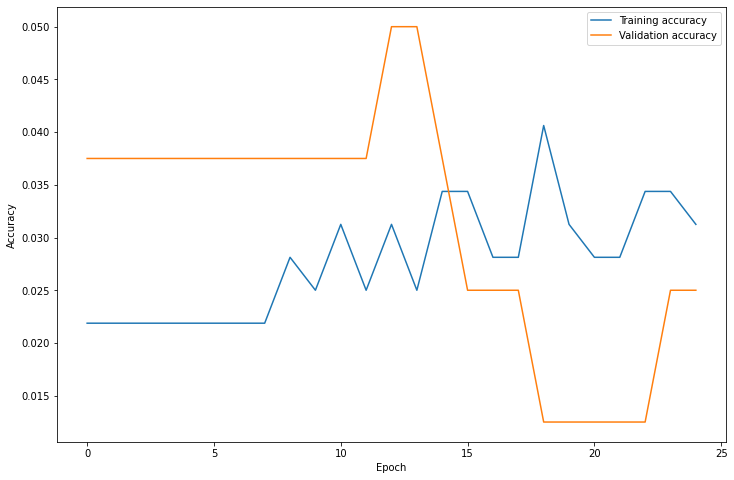

In [ ]:
# batchsize = 32, optimizer = SGD
# Import the necessary libraries
import numpy as np
import time
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/25
10/10 [==============================] - 3s 227ms/step - loss: 3.7089 - accuracy: 0.0188 - val_loss: 3.6982 - val_accuracy: 0.0000e+00
Epoch 2/25
10/10 [==============================] - 1s 150ms/step - loss: 3.6890 - accuracy: 0.0250 - val_loss: 3.6987 - val_accuracy: 0.0000e+00
Epoch 3/25
10/10 [==============================] - 2s 153ms/step - loss: 3.6890 - accuracy: 0.0281 - val_loss: 3.7087 - val_accuracy: 0.0000e+00
Epoch 4/25
10/10 [==============================] - 1s 150ms/step - loss: 3.6860 - accuracy: 0.0344 - val_loss: 3.7272 - val_accuracy: 0.0000e+00
Epoch 5/25
10/10 [==============================] - 1s 150ms/step - loss: 3.6790 - accuracy: 0.0437 - val_loss: 3.7298 - val_accuracy: 0.0000e+00
Epoch 6/25
10/10 [==============================] - 1s 149ms/step - loss: 3.6791 - accuracy: 0.0312 - val_loss: 3.7427 - val_accuracy: 0.0000e+00
Epoch 7/25
10/10 [==============================] - 1s 148ms/step - loss: 3.6624 - accuracy: 0.0375 - val_loss: 3.8830 - val

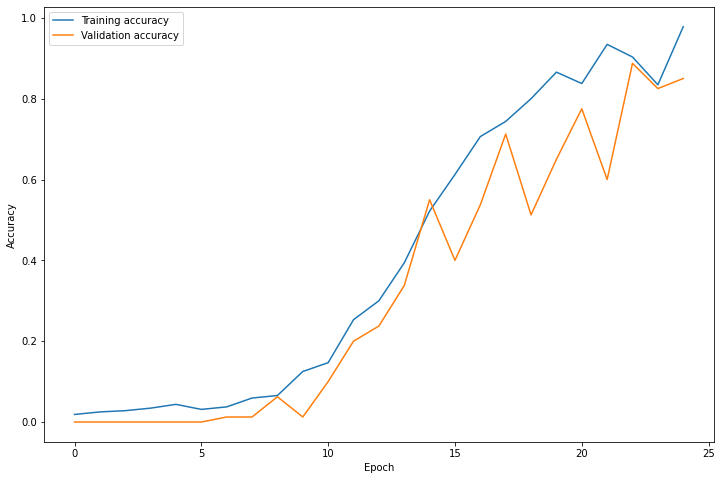

In [ ]:
# batchsize = 32, optimizer = RMSProp
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### CNN Visualization

In [ ]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')
])

tensorboard_callback = TensorBoard(log_dir='./logs')

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[tensorboard_callback])


Epoch 1/10
10/10 [==============================] - 7s 424ms/step - loss: 3.7105 - accuracy: 0.0156
Epoch 2/10
10/10 [==============================] - 6s 597ms/step - loss: 3.6888 - accuracy: 0.0344
Epoch 3/10
10/10 [==============================] - 5s 536ms/step - loss: 3.6873 - accuracy: 0.0375
Epoch 4/10
10/10 [==============================] - 7s 708ms/step - loss: 3.6760 - accuracy: 0.0281
Epoch 5/10
10/10 [==============================] - 5s 526ms/step - loss: 3.6671 - accuracy: 0.0344
Epoch 6/10
10/10 [==============================] - 7s 675ms/step - loss: 3.6393 - accuracy: 0.0719
Epoch 7/10
10/10 [==============================] - 3s 240ms/step - loss: 3.5839 - accuracy: 0.0750
Epoch 8/10
10/10 [==============================] - 2s 211ms/step - loss: 3.4286 - accuracy: 0.1312
Epoch 9/10
10/10 [==============================] - 2s 209ms/step - loss: 3.1644 - accuracy: 0.1844
Epoch 10/10
10/10 [==============================] - 2s 208ms/step - loss: 2.7046 - accuracy: 0.3594